# Hypothesis Testing

## 1) One Sample Test
## 2) One Sample Ratio Test
## 3) Independent 2 Samples T Test (A/B Test)
## 4) Dependent 2 Samples Test
## 5) Two Sample Ratio Test
## 6) ANOVA Test (Analysis of Variance)
## 7) Correlation Test


- If P value < 0.05 H0 is not rejected.(This is pleasing result.) 
- In distribution tests, it is not good news to rejected, because it tells that sample doesn't represent data.



## 1) One Sample Test

Normality Test is must! If Normalility Test result meets requirements (p-value > 0.05), we can continue to Hypothesis Testing. \
(Shapiro-Wilks Testing is a normality test.)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/User/bankcustomers-data.csv") 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


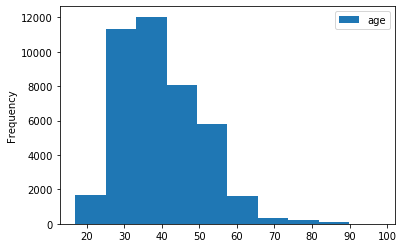

In [3]:
pd.DataFrame(df["age"]).plot.hist();

<i>Shapiro - Wilks Test<i/>

In [9]:
from scipy.stats import shapiro
shapiro(df["age"])

# P value on the RIGTH has to be greater than .05 in order to continue with parametric test otherwise we use non parametric. 
# In this sample not provided. Anyway let's go with parametric test

C:\Users\User\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9572664499282837, 0.0)

***Parametric One Sample Test***

In [5]:
from scipy import stats
stats.ttest_1samp(df["age"], df["age"].mean())  

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

If the result doesn't meet the condition in Shapiro Test, then we will go with nonparametric test 

***NONPARAMETRIC ONE SAMPLE TEST***

In [7]:
from statsmodels.stats.descriptivestats import sign_test
sign_test(df.age, df.age.mean())

(-3174.0, 1.493680609605257e-215)

## 2) One Sample Ratio Test

If n > 30, this test can be proceed. / 

In [8]:
from statsmodels.stats.proportion import proportions_ztest
count=40
nobs=500
value=0.125
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

## 3) Independent 2 Samples T  Test (A/B Test)

***Hypothesis*** \
    ***1) Normality*** \
    ***2) variance homogenity***

Test model will changes if 

1) sample counts are same and variance is distributed homogenic \
2) sample counts are different and variance is homogenic \
3) sample counts are different and variance is NOT homogenic

In [11]:
# Let's create Population A

import numpy as np
population_A = np.random.randint(18,36,100000)
population_A
np.random.seed(115)
A = np.random.choice(a=population_A, size=100)
print(population_A.mean())
print(A.mean())

26.49145
26.89


In [12]:
# Let's create Population B

population_B = np.random.randint(22,40,100000)
B=np.random.choice(a=population_B, size=100)
np.random.seed(500)
print(population_B.mean())
print(B.mean())

30.49348
29.94


In [13]:
# Let's concatenate Populations A and B

A=pd.DataFrame(A)
B=pd.DataFrame(B)
A_B=pd.concat([A,B], axis=1)
A_B.columns =["Sample_A","Sample_B"]
A_B.head()

,Sample_A,Sample_B
0,35,29
1,24,34
2,26,29
3,25,32
4,35,34


In [14]:
# Let's gather values into same column and create a new column displaying population groups

GroupA =np.arange(len(A))
GroupA =pd.DataFrame(GroupA)
GroupA[:]="A"
A = pd.concat([A,GroupA], axis=1)
A

,0,0
0,35,A
1,24,A
2,26,A
3,25,A
4,35,A
...,...,...
95,29,A
96,25,A
97,32,A
98,35,A


In [15]:
GroupB= np.arange(len(B))
GroupB= pd.DataFrame(GroupB)
GroupB[:]="B"
B = pd.concat([B, GroupB], axis=1)
B

,0,0
0,29,B
1,34,B
2,29,B
3,32,B
4,34,B
...,...,...
95,37,B
96,29,B
97,35,B
98,26,B


In [16]:
# let's make union Population A data and Population B data

AB=pd.concat([A,B])
AB.columns=["age","group"]

print(AB)

    age group
0    35     A
1    24     A
2    26     A
3    25     A
4    35     A
..  ...   ...
95   37     B
96   29     B
97   35     B
98   26     B
99   31     B

[200 rows x 2 columns]


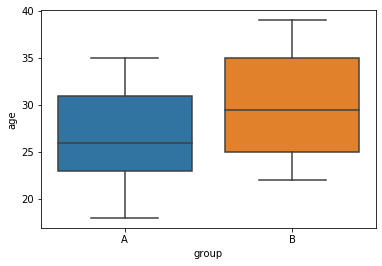

In [17]:
# Let's visualize correlation of groups

import seaborn as sns
sns.boxplot(x="group", y="age", data=AB);

In [18]:
# Let's check Normality Test

from scipy.stats import shapiro
print(shapiro(A_B.Sample_A))
print(shapiro(A_B.Sample_B))    # Ho are rejected for both. Even so, let move forward  to practice now

(0.9673922061920166, 0.01400982216000557)
(0.9377446174621582, 0.00014082450070418417)


In [19]:
# Let's check variance homagenity

stats.levene(A_B.Sample_A, A_B.Sample_B)  #Ho is rejected for variance.

# Normally, this test cannot be continued with parametric methods, since the conditions of normality and homogeneity are not met.
# Even so, let's continue to learn and practice

LeveneResult(statistic=3.5478043890891247, pvalue=0.06109015660476769)

<i> Let's assume that we prepared data and verified assumptions <i/> \
***Let's start to A/B Test***

In [20]:
# AB Test
test_ist, p_value = stats.ttest_ind(A_B["Sample_A"], A_B["Sample_B"], equal_var=True)

print("T test = %.4f, p value = %.4f"% (test_ist,p_value))

T test = -4.3338, p value = 0.0000


***NONEPARAMETRIC INDEPENDENT 2 SAMPLES TEST***

- MANN WHITNEYU TEST for nonparametric test

In [22]:
stats.mannwhitneyu(A_B.Sample_A, A_B.Sample_B)

MannwhitneyuResult(statistic=3440.0, pvalue=6.74849310033058e-05)

## 4) DEPENDENT 2 SAMPLES T TEST

***Hypothesis*** \
    ***1) Normality*** \
    ***2) variance homogenity***
    
    
***Business Practice :*** 
The team are taken some trainning and the difference is wanted to compare before and later.

In [23]:
before_train = np.random.randint(30, 60, 10000)
after_train = np.random.randint(40, 70, 10000)
print(before_train.mean(), after_train.mean())

44.5377 54.4324


In [24]:
before_train_df =pd.DataFrame(before_train)
after_train_df=pd.DataFrame(after_train)

before_after = pd.concat([before_train_df, after_train_df], axis=1)
before_after.columns= ["before_train", "after_train"]
before_after.head()

,before_train,after_train
0,56,68
1,53,61
2,31,65
3,47,51
4,44,40


In [25]:
group_before = np.arange(len(before_train_df))
group_before =pd.DataFrame(group_before)
group_before[:]=["before train"]
before = pd.concat([before_train_df, group_before], axis=1)
before.head()

,0,0
0,56,before train
1,53,before train
2,31,before train
3,47,before train
4,44,before train


In [26]:
group_after = np.arange(len(after_train_df))
group_after = pd.DataFrame(group_after)
group_after[:]=["after train"]
after = pd.concat([after_train_df,group_after], axis=1)
after.head()

,0,0
0,68,after train
1,61,after train
2,65,after train
3,51,after train
4,40,after train


In [27]:
# making union all the columns before_training and after_training

train_results= pd.concat([before, after])
train_results.columns =["grades", "before_after_train"]
print(train_results)

      grades before_after_train
0         56       before train
1         53       before train
2         31       before train
3         47       before train
4         44       before train
...      ...                ...
9995      49        after train
9996      44        after train
9997      68        after train
9998      60        after train
9999      40        after train

[20000 rows x 2 columns]


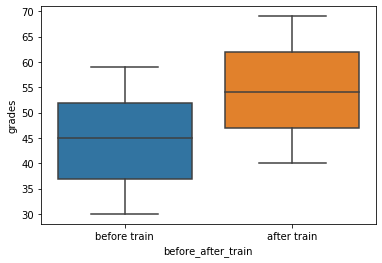

In [28]:
sns.boxplot(x="before_after_train", y="grades", data=train_results);

- Normality Test / Shapiro Test

In [29]:
print(shapiro(before_after.before_train))
print(shapiro(before_after.after_train))

(0.9525379538536072, 0.0)
(0.9518826603889465, 0.0)


C:\Users\User\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- Variance homagenity Test

In [30]:
stats.levene(before_after.before_train, before_after.after_train)

LeveneResult(statistic=0.05760741522518714, pvalue=0.8103207409667477)

In [31]:
# let's make hypothesis testing now

from scipy.stats import ttest_rel
ttest_rel (before_after.before_train, before_after.after_train)

Ttest_relResult(statistic=-80.99296523922844, pvalue=0.0)

***Let's assume NONPARAMETRIC TEST FOR DEPENDENT 2 SAMPLES is required.***

***WILLCOXON TEST*** for Dependent 2 Samples Nonparametric Test

In [32]:
stats.wilcoxon(before_after.before_train, before_after.after_train)

WilcoxonResult(statistic=6071296.0, pvalue=0.0)

## 5) TWO SAMPLES RATIO TESTING

***HYPOTHESIS:*** 
- n1>30 and n2>30 are required! / Z Test



***Business Practice :*** 

Should "Buy Now" button has green or red background in a online shopping website ?

Green button is viewed 1000 times, clicked 300 times \
Red button is viewed 1100 times, click 250 times

In [33]:
from statsmodels.stats.proportion import proportions_ztest as ztest
import numpy as np

clicked=np.array([250, 300])
viewed =np.array([1100, 1000])
ztest(count=clicked, nobs=viewed)

(-3.7857863233209255, 0.0001532232957772221)

## 6) ANOVA (ANALYSIS OF VARIANCE)

***ANOVA will be used if there are more than 2 group***


***HYPOTHESIS :***

1) Observations must be independent \
2) Normal DistributioN \
3) Variance homogenity <--- important  

***Business Practice:*** \
Duration passing in news portal is wanted to increase. For that, we have 3 different strategy. Which one is the best?

1) A: news as it is \
2) B: directive news \
3) C: attractive news 

In [34]:
A = np.random.randint(25,50,10000)
B = np.random.randint(31,50,10000)
C = np.random.randint(40,50,10000)

A = pd.DataFrame(A)
B = pd.DataFrame(B)
C = pd.DataFrame(C)

dfs=[A,B,C]
ABC=pd.concat(dfs, axis=1)
ABC.columns = "GroupA","GroupB","GroupC"
ABC.head()

,GroupA,GroupB,GroupC
0,41,40,41
1,39,36,44
2,34,31,46
3,27,33,43
4,33,32,40


In [35]:
GroupA = np.arange(len(A))
GroupA = pd.DataFrame(GroupA)
GroupA[:]="GroupA"
GroupA = pd.concat([A, GroupA], axis=1)

GroupB = np.arange(len(B))
GroupB = pd.DataFrame(GroupB)
GroupB[:]="GroupB"
GroupB = pd.concat([B,GroupB], axis=1)

GroupC = np.arange(len(C))
GroupC = pd.DataFrame(GroupC)
GroupC[:]="GroupC"
GroupC = pd.concat([C,GroupC], axis=1)

In [36]:
ABC_ =pd.concat([GroupA, GroupB, GroupC])
ABC_.columns=["click_count","strategies"]
ABC_

,click_count,strategies
0,41,GroupA
1,39,GroupA
2,34,GroupA
3,27,GroupA
4,33,GroupA
...,...,...
9995,40,GroupC
9996,48,GroupC
9997,44,GroupC
9998,44,GroupC


 Dataset is ready now! \
 Let's visualize the dataset.

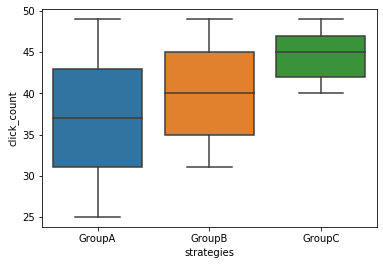

In [37]:
sns.boxplot(y="click_count", x="strategies", data=ABC_);

Now, we will apply pre-hypothesis tests if it is possible to apply ANOVA Testing

We assume our observations are independent! Let's practice Normality and Variance Homogenity Tests.

In [38]:
# Normality Test (Shapiro Testing)

from scipy.stats import shapiro
print(shapiro(ABC.GroupA))
print(shapiro(ABC.GroupB))
print(shapiro(ABC.GroupC))

(0.9492257237434387, 0.0)
(0.9491139650344849, 0.0)
(0.9360555410385132, 0.0)


C:\Users\User\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [39]:
# Variance Homogenity (Levene Test)

stats.levene(ABC.GroupA, ABC.GroupB, ABC.GroupC)

LeveneResult(statistic=4806.575743421362, pvalue=0.0)

Now, let's assume that 3 required tests are verified.

***ANOVA Testing (f oneway test)***

In [40]:
from scipy.stats import f_oneway
f_oneway (ABC.GroupA, ABC.GroupB, ABC.GroupC)  

# Actually, outputs are not pleasing, however let's continue to practice.

F_onewayResult(statistic=4685.404154771547, pvalue=0.0)

In [42]:
# to see result easily
# print("{:.5f}".format(f_oneway (ABC.GroupA, ABC.GroupB, ABC.GroupC)[1])

In [43]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GroupA,10000.0,37.0418,7.261179,25.0,31.0,37.0,43.0,49.0
GroupB,10000.0,39.9772,5.476283,31.0,35.0,40.0,45.0,49.0
GroupC,10000.0,44.5219,2.868892,40.0,42.0,45.0,47.0,49.0


***ANOVA NONPARAMETRIC HYPOTHESIS TESTING***
- KRUSKAL Testing

In [44]:
from scipy.stats import kruskal
kruskal(ABC.GroupA, ABC.GroupB, ABC.GroupC)

KruskalResult(statistic=6328.8677388237675, pvalue=0.0)

# 7) Correlation Analysis

***Hypothesis***

1) Normal Distibution for each variables \
2) If first hypothesis is provided it will PEARSON Correlation Coefficient will be used. If not, SPEARMAN Correlation Coefficient will be used.


***Business Practice:*** \
Is there any correlation btw bills and tips?

In [45]:
bill = np.random.randint(50, 200, 1000)
tip = np.random.randint (0,12,1000)

bill=pd.DataFrame(bill)
tip=pd.DataFrame(tip)
bill_tip=pd.concat([bill, tip],axis=1)
bill_tip.columns=["bill","tip"]
bill_tip

,bill,tip
0,55,9
1,107,9
2,79,5
3,51,9
4,68,9
...,...,...
995,162,7
996,160,4
997,121,2
998,107,8


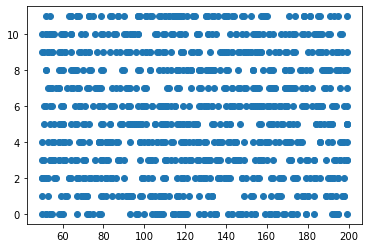

In [48]:
import matplotlib.pyplot as plt
plt.scatter(x="bill", y="tip", data=bill_tip);

In [49]:
# Let's make Normality Testing

from scipy.stats import shapiro
print(shapiro(bill_tip["bill"]))
print(shapiro(bill_tip["tip"]))

(0.9575996398925781, 2.0085684337307343e-16)
(0.9442066550254822, 5.835802648543769e-19)


In [50]:
# Both P values are smaller than 0.05. So samples don't reflet population. 
# So we will proceed with Nonparametric Test/SPEARMAN

bill_tip.bill.corr(bill_tip.tip, method="spearman")

-0.0042530914167657995

### Test of Significant / Korelasyon Anlamlilik Testi

### Is the output we obtain significant? / Buldugumuz sayi anlamli mi?

- If there is Normal Distribution, we will apply PARAMETRIC Test (PEARSON) 
- If there is NO Normal Distribution, we will apply NONPARAMETRIC Test (SPEARMAN) 

In [52]:
from scipy.stats.stats import pearsonr
test_ist, pvalue = pearsonr(bill_tip["tip"], bill_tip["bill"])
test_ist


-0.004924896525559898

In [53]:
print ("Test_ist=%.4f, P Value=%.4f" % (test_ist,pvalue))

Test_ist=-0.0049, P Value=0.8764


***NONPARAMETRIC Correlation Test***
- Spearman test
- Kendalltau test

In [55]:
from scipy.stats.stats import spearmanr
test_ist1, pvalue1= spearmanr((bill_tip["tip"], bill_tip["bill"]))

print ("Test_ist1=%.4f, P Value1=%.4f" % (test_ist,pvalue))

Test_ist1=-0.0049, P Value1=0.8764


In [56]:
# KENDALLTAU Testing
# (Aslinda Spearman testi yeterli, yine de bil!)

stats.kendalltau (bill_tip["tip"], bill_tip["bill"])

KendalltauResult(correlation=-0.002831959610743962, pvalue=0.8977964972794278)